In [1]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.6 MB/s eta 0:00:00


<ipython-input-7-d0526374a42d>:73: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Text Content'] = df['Text Content'].str.replace(keyword, '')


Predicted Category for the new text: Sachal jo kalam 
Accuracy: 1.0

Classification Report:
                   precision    recall  f1-score   support

Sachal jo kalam        1.00      1.00      1.00     20875

        accuracy                           1.00     20875
       macro avg       1.00      1.00      1.00     20875
    weighted avg       1.00      1.00      1.00     20875

Data saved to output_excel_file_with_preprocessing.xlsx


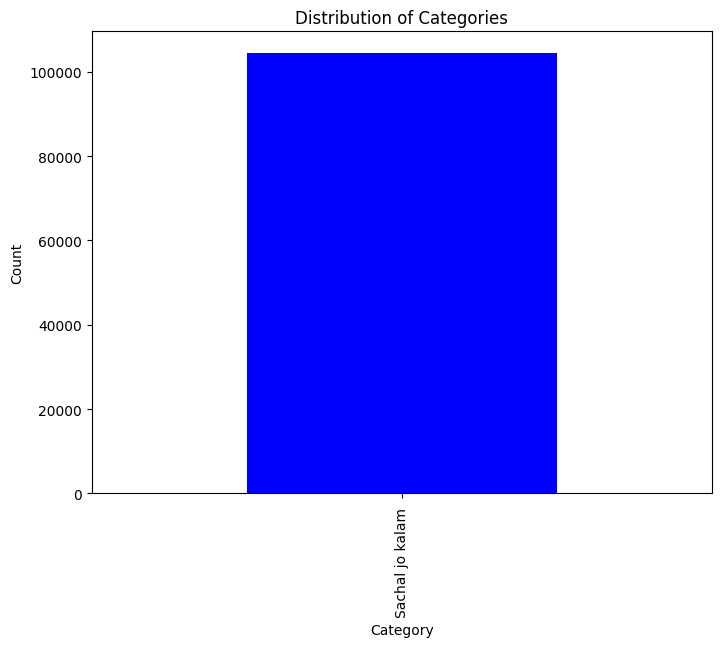

In [7]:
import PyPDF2
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

pdf_file_paths = [
    '/content/sachal 1.pdf', '/content/sachal 2.pdf', '/content/sachal 3.pdf', '/content/sachal 4.pdf'
]


text = ""

for pdf_file_path in pdf_file_paths:
    pdf_reader = PyPDF2.PdfReader(pdf_file_path)

    for i in range(len(pdf_reader.pages)):
        text += pdf_reader.pages[i].extract_text()

text = text.replace(".", "\n")


def extract_text_from_pdfs(pdf_file_paths):
    text = ""
    for pdf_file_path in pdf_file_paths:
        pdf_reader = PyPDF2.PdfReader(pdf_file_path)
        for i in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[i].extract_text()
    text = text.replace(".", "\n")
    return text

def replace_word(text, old_word, new_word):
    return text.replace(old_word, new_word)

def preprocess_text(text):
    text = text.lower()
    text = ' '.join(re.findall(r'\b\w+\b', text))
    return text

def remove_keywords(text, keywords_to_remove):
    for keyword in keywords_to_remove:
        text = text.replace(keyword, '')
    return text

pdf_file_paths = ['/content/sachal 1.pdf','/content/sachal 2.pdf','/content/sachal 3.pdf','/content/sachal 4.pdf']

new_text = "Your new text goes here."

old_word = 'א'
new_word = 'ا'

text = extract_text_from_pdfs(pdf_file_paths)
text = replace_word(text, old_word, new_word)


sentences = text.split('\n')
data = {'Text Content': sentences, 'Category': ['Sachal jo kalam '] * len(sentences)}

df = pd.DataFrame(data)

def preprocess_text(text):
    text = text.lower()
    text = ' '.join(re.findall(r'\b\w+\b', text))
    return text

df['Text Content'] = df['Text Content'].apply(preprocess_text)

keywords_to_remove = ['.', ',', ':', '!', '@', '#', '$', '&', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z','r', '$', '&', '*', '(', ')', '-', '=', '{', '}', '[', ']', '\\', '/', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '`', '#', '<', '>', '?', '©']
for keyword in keywords_to_remove:
    df['Text Content'] = df['Text Content'].str.replace(keyword, '')

df = df[df['Text Content'].notna() & (df['Text Content'] != '')]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text Content'])

X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

new_text = "Your new text goes here."
new_text = preprocess_text(new_text)
new_text_vectorized = vectorizer.transform([new_text])
predicted_category = clf.predict(new_text_vectorized)
print("Predicted Category for the new text:", predicted_category[0])

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

excel_file_name = "Sachal_jo_kalam_Scraping_data.xlsx"
df.to_excel(excel_file_name, index=False)
print(f"Data saved to {excel_file_name}")

plt.figure(figsize=(8, 6))
df['Category'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()


<ipython-input-3-cbd654485112>:71: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Text Content'] = df['Text Content'].str.replace(keyword, '')


Predicted Category for the new text: Shah Jo Risalo 
Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

Shah Jo Risalo        1.00      1.00      1.00      6459

       accuracy                           1.00      6459
      macro avg       1.00      1.00      1.00      6459
   weighted avg       1.00      1.00      1.00      6459

Data saved to Sachal_jo_risalo_Scraping_data.xlsx


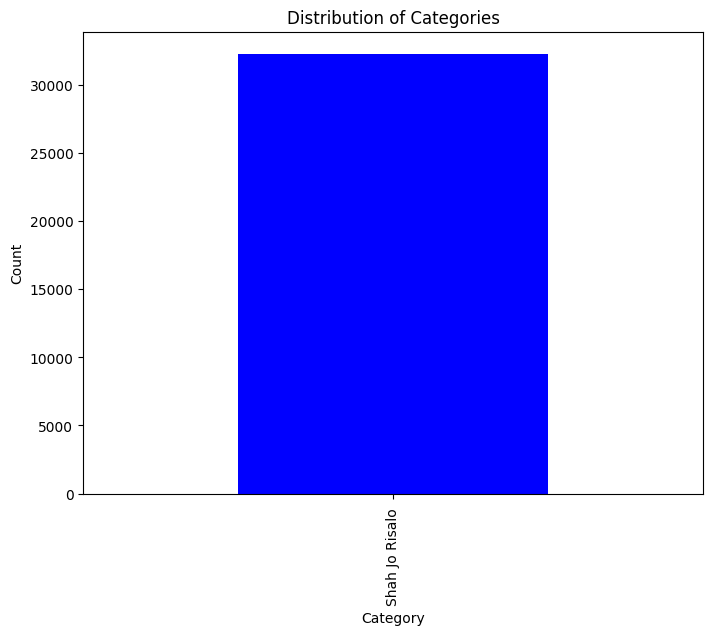

In [3]:
import PyPDF2
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

pdf_file_paths = [
    '/content/shah 1.pdf','/content/shah 2.pdf','/content/shah 3.pdf','/content/shah 4.pdf'
]

text = ""

for pdf_file_path in pdf_file_paths:
    pdf_reader = PyPDF2.PdfReader(pdf_file_path)

    for i in range(len(pdf_reader.pages)):
        text += pdf_reader.pages[i].extract_text()

text = text.replace(".", "\n")


def extract_text_from_pdfs(pdf_file_paths):
    text = ""
    for pdf_file_path in pdf_file_paths:
        pdf_reader = PyPDF2.PdfReader(pdf_file_path)
        for i in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[i].extract_text()
    text = text.replace(".", "\n")
    return text

def replace_word(text, old_word, new_word):
    return text.replace(old_word, new_word)

def preprocess_text(text):
    text = text.lower()
    text = ' '.join(re.findall(r'\b\w+\b', text))
    return text

def remove_keywords(text, keywords_to_remove):
    for keyword in keywords_to_remove:
        text = text.replace(keyword, '')
    return text

pdf_file_paths = ['/content/shah 1.pdf','/content/shah 2.pdf','/content/shah 3.pdf','/content/shah 4.pdf']

new_text = "Your new text goes here."

old_word = 'א'
new_word = 'ا'

text = extract_text_from_pdfs(pdf_file_paths)
text = replace_word(text, old_word, new_word)

sentences = text.split('\n')
data = {'Text Content': sentences, 'Category': ['Shah Jo Risalo '] * len(sentences)}

df = pd.DataFrame(data)

def preprocess_text(text):
    text = text.lower()
    text = ' '.join(re.findall(r'\b\w+\b', text))
    return text

df['Text Content'] = df['Text Content'].apply(preprocess_text)

keywords_to_remove = ['.', ',', ':', '!', '@', '#', '$', '&', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z','r', '$', '&', '*', '(', ')', '-', '=', '{', '}', '[', ']', '\\', '/', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '`', '#', '<', '>', '?', '©']
for keyword in keywords_to_remove:
    df['Text Content'] = df['Text Content'].str.replace(keyword, '')

df = df[df['Text Content'].notna() & (df['Text Content'] != '')]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text Content'])

X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

new_text = "Your new text goes here."
new_text = preprocess_text(new_text)
new_text_vectorized = vectorizer.transform([new_text])
predicted_category = clf.predict(new_text_vectorized)
print("Predicted Category for the new text:", predicted_category[0])

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

excel_file_name = "SHAH_jo_risalo_Scraping_data.xlsx"
df.to_excel(excel_file_name, index=False)
print(f"Data saved to {excel_file_name}")

plt.figure(figsize=(8, 6))
df['Category'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()


<ipython-input-4-bd7f990299da>:72: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Text Content'] = df['Text Content'].str.replace(keyword, '')


Predicted Category for the new text: Altaf Shaikh
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

Altaf Shaikh       1.00      1.00      1.00      1092

    accuracy                           1.00      1092
   macro avg       1.00      1.00      1.00      1092
weighted avg       1.00      1.00      1.00      1092

Data saved to Altaf_shaikh_Scraping_data.xlsx


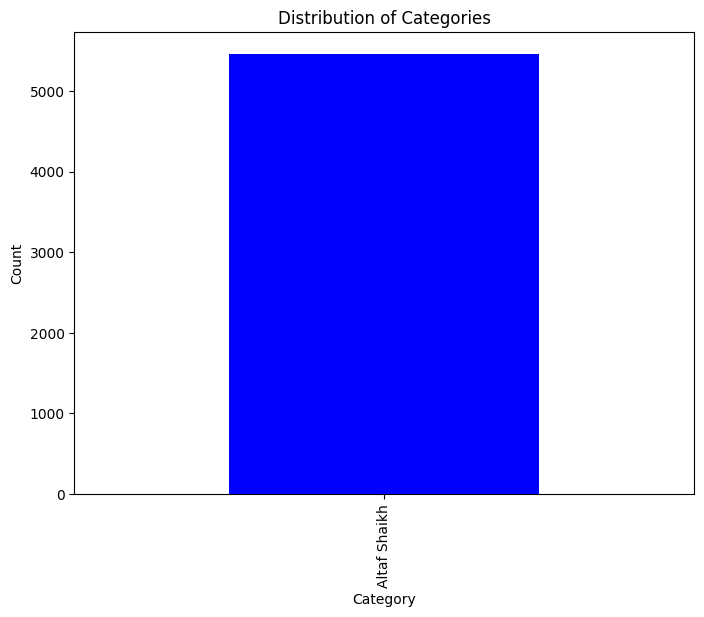

In [4]:
import PyPDF2
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

pdf_file_paths = [
    '/content/altaf 1.pdf', '/content/altaf 2.pdf'
]

text = ""

for pdf_file_path in pdf_file_paths:
    pdf_reader = PyPDF2.PdfReader(pdf_file_path)

    for i in range(len(pdf_reader.pages)):
        text += pdf_reader.pages[i].extract_text()

text = text.replace(".", "\n")



def extract_text_from_pdfs(pdf_file_paths):
    text = ""
    for pdf_file_path in pdf_file_paths:
        pdf_reader = PyPDF2.PdfReader(pdf_file_path)
        for i in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[i].extract_text()
    text = text.replace(".", "\n")
    return text

def replace_word(text, old_word, new_word):
    return text.replace(old_word, new_word)

def preprocess_text(text):
    text = text.lower()
    text = ' '.join(re.findall(r'\b\w+\b', text))
    return text

def remove_keywords(text, keywords_to_remove):
    for keyword in keywords_to_remove:
        text = text.replace(keyword, '')
    return text

pdf_file_paths = [ '/content/altaf 1.pdf', '/content/altaf 2.pdf']

new_text = "Your new text goes here."

old_word = 'א'
new_word = 'ا'

text = extract_text_from_pdfs(pdf_file_paths)
text = replace_word(text, old_word, new_word)

sentences = text.split('\n')
data = {'Text Content': sentences, 'Category': ['Altaf Shaikh'] * len(sentences)}

df = pd.DataFrame(data)

def preprocess_text(text):
    text = text.lower()
    text = ' '.join(re.findall(r'\b\w+\b', text))
    return text

df['Text Content'] = df['Text Content'].apply(preprocess_text)

keywords_to_remove = ['.', ',', ':', '!', '@', '#', '$', '&', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z','r', '$', '&', '*', '(', ')', '-', '=', '{', '}', '[', ']', '\\', '/', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '`', '#', '<', '>', '?', '©']
for keyword in keywords_to_remove:
    df['Text Content'] = df['Text Content'].str.replace(keyword, '')

df = df[df['Text Content'].notna() & (df['Text Content'] != '')]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text Content'])

X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

new_text = "Your new text goes here."
new_text = preprocess_text(new_text)
new_text_vectorized = vectorizer.transform([new_text])
predicted_category = clf.predict(new_text_vectorized)
print("Predicted Category for the new text:", predicted_category[0])

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

excel_file_name = "Altaf_shaikh_Scraping_data.xlsx"
df.to_excel(excel_file_name, index=False)
print(f"Data saved to {excel_file_name}")

plt.figure(figsize=(8, 6))
df['Category'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()


<ipython-input-6-431151df1db2>:71: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Text Content'] = df['Text Content'].str.replace(keyword, '')


Predicted Category for the new text: Ayaz Shaikh
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

 Ayaz Shaikh       1.00      1.00      1.00      3445

    accuracy                           1.00      3445
   macro avg       1.00      1.00      1.00      3445
weighted avg       1.00      1.00      1.00      3445

Data saved to Ayaz_shaikh_Scraping_data.xlsx


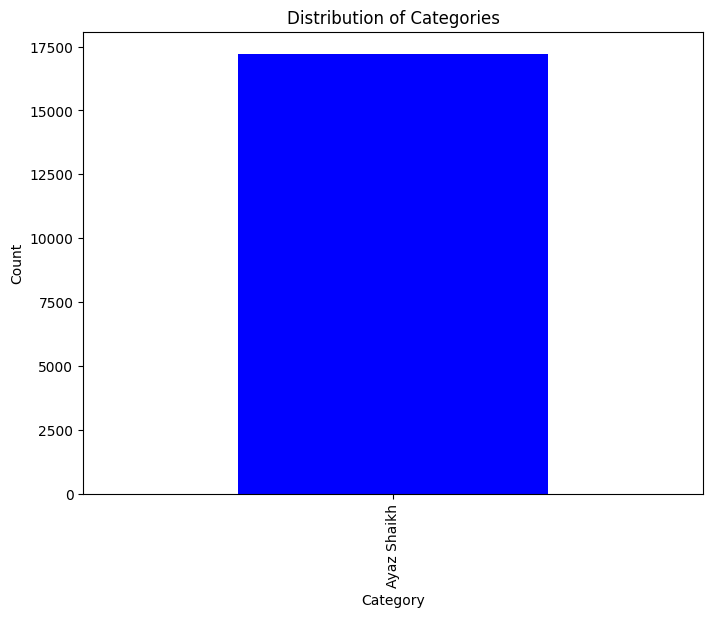

In [6]:
import PyPDF2
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

pdf_file_paths = [
    '/content/ayaz 1.pdf', '/content/ayaz 2.pdf','/content/ayaz 3.pdf', '/content/ayaz 4.pdf', '/content/ayaz 5.pdf'
]

text = ""

for pdf_file_path in pdf_file_paths:
    pdf_reader = PyPDF2.PdfReader(pdf_file_path)

    for i in range(len(pdf_reader.pages)):
        text += pdf_reader.pages[i].extract_text()

text = text.replace(".", "\n")


def extract_text_from_pdfs(pdf_file_paths):
    text = ""
    for pdf_file_path in pdf_file_paths:
        pdf_reader = PyPDF2.PdfReader(pdf_file_path)
        for i in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[i].extract_text()
    text = text.replace(".", "\n")
    return text

def replace_word(text, old_word, new_word):
    return text.replace(old_word, new_word)

def preprocess_text(text):
    text = text.lower()
    text = ' '.join(re.findall(r'\b\w+\b', text))
    return text

def remove_keywords(text, keywords_to_remove):
    for keyword in keywords_to_remove:
        text = text.replace(keyword, '')
    return text

pdf_file_paths = [ '/content/ayaz 1.pdf', '/content/ayaz 2.pdf','/content/ayaz 3.pdf', '/content/ayaz 4.pdf', '/content/ayaz 5.pdf','/content/ayaz 6.pdf', '/content/ayaz 7.pdf', '/content/ayaz 8.pdf']

new_text = "Your new text goes here."

old_word = 'א'
new_word = 'ا'

text = extract_text_from_pdfs(pdf_file_paths)
text = replace_word(text, old_word, new_word)

sentences = text.split('\n')
data = {'Text Content': sentences, 'Category': ['Ayaz Shaikh'] * len(sentences)}

df = pd.DataFrame(data)

def preprocess_text(text):
    text = text.lower()
    text = ' '.join(re.findall(r'\b\w+\b', text))
    return text

df['Text Content'] = df['Text Content'].apply(preprocess_text)

keywords_to_remove = ['.', ',', ':', '!', '@', '#', '$', '&', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z','r', '$', '&', '*', '(', ')', '-', '=', '{', '}', '[', ']', '\\', '/', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '`', '#', '<', '>', '?', '©']
for keyword in keywords_to_remove:
    df['Text Content'] = df['Text Content'].str.replace(keyword, '')

df = df[df['Text Content'].notna() & (df['Text Content'] != '')]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text Content'])

X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

new_text = "Your new text goes here."
new_text = preprocess_text(new_text)
new_text_vectorized = vectorizer.transform([new_text])
predicted_category = clf.predict(new_text_vectorized)
print("Predicted Category for the new text:", predicted_category[0])

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

excel_file_name = "Ayaz_shaikh_Scraping_data.xlsx"
df.to_excel(excel_file_name, index=False)
print(f"Data saved to {excel_file_name}")

plt.figure(figsize=(8, 6))
df['Category'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()


<ipython-input-8-68b700a2c0b5>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
<ipython-input-8-68b700a2c0b5>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
<ipython-input-8-68b700a2c0b5>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
<ipython-input-8-68b700a2c0b5>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)


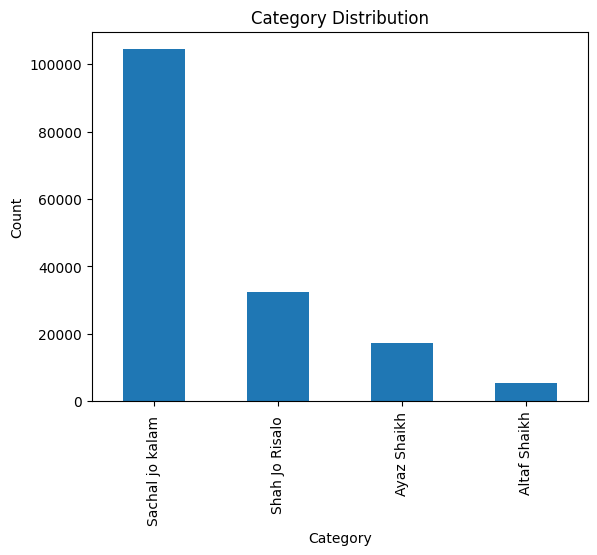

Data merged successfully and saved to 'merged_file.xlsx'


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from matplotlib.animation import FuncAnimation

file_paths = ['/content/output_excel_file_with_preprocessing.xlsx', '/content/Sachal_jo_risalo_Scraping_data.xlsx', '/content/Altaf_shaikh_Scraping_data.xlsx', '/content/Ayaz_shaikh_Scraping_data.xlsx']

merged_data = pd.DataFrame()

for file_path in file_paths:
    data = pd.read_excel(file_path)

    merged_data = merged_data.append(data, ignore_index=True)

merged_data.to_excel('merged_file.xlsx', index=False)

category_distribution = merged_data['Category'].value_counts()
category_distribution.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

print("Data merged successfully and saved to 'merged_file.xlsx'")
